<a href="https://colab.research.google.com/github/fjve-v/analisis_everpeak/blob/main/DIAGNOSTICO_RAPIDO_DE_CALIDAD_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conteo de valores faltantes por columna



In [2]:
import pandas as pd
df = pd.read_csv("everpeak_retail.csv")



In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          5008 non-null   int64  
 1   order_date        5000 non-null   object 
 2   customer_id       5008 non-null   int64  
 3   product_category  5008 non-null   object 
 4   price             5008 non-null   int64  
 5   quantity          5008 non-null   int64  
 6   order_value       5008 non-null   int64  
 7   payment_method    5008 non-null   object 
 8   city              4908 non-null   object 
 9   state             4908 non-null   object 
 10  customer_age      4858 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 430.5+ KB


,order_id,order_date,customer_id,product_category,price,quantity,order_value,payment_method,city,state,customer_age
0,1,2024-02-02,2616,Sports,269,50,13385,credit_card,New York,NY,66.0
1,2,2024-10-10,1736,Grocery,66,0,660,debit_card,Los Angeles,CA,24.0
2,3,2024-08-27,2543,Sports,267,0,5073,credit_card,Chicago,IL,23.0
3,4,2024-06-09,2252,Toys,114,125,14290,credit_card,New York,NY,70.0
4,5,2024-06-07,1583,Fashion,729,16,11754,credit_card,Houston,TX,75.0


In [3]:
payment_missing =df['payment_method'].isna().sum()
city_missing =df['city'].isna().sum()
state_missing =df['state'].isna().sum()
order_date_missing= df['customer_age'].isna().sum()


print("payment_method missing:", payment_missing)
print("city missing:", city_missing)
print("state missing:", state_missing)
print("order_date:", state_missing)

payment_method missing: 0
city missing: 100
state missing: 100
order_date: 100


# FECHAS SOSPECHOSAS Y MONTOS EXTREMOS


In [4]:
df["order_date"] =pd.to_datetime(df['order_date'], errors='coerce')

invalid_year_2026_count =(df['order_date'].dt.year == 2026).sum()
missing_order_date_count =df['order_date'].isna().sum()

print("order_date año 2026:", invalid_year_2026_count)
print("order_date missing:", missing_order_date_count)

order_date año 2026: 15
order_date missing: 8


# CARDINALIDAD EN COLUMNA DE CLIENTES

In [5]:
customer_id_unicos = df["customer_id"].unique()

payment_unicos =df["payment_method"].unique()
city_unicos = df["city"].unique()
state_unicos =df["state"].unique()

print("customer_id nunique:", df['customer_id'].nunique())
print("payment_method nunique:", df['payment_method'].nunique())
print("city nunique:", df['city'].nunique())
print("state nunique:", df['state'].nunique())

customer_id nunique: 1829
payment_method nunique: 4
city nunique: 10
state nunique: 9


# DETECTAR PARTONES DE MISSIGNESS POR GRUPO

In [6]:
missing_city_by_pay = df["city"].isna().groupby(df["payment_method"]).mean().sort_values(ascending=False).head(10)#tu código aquí
print(missing_city_by_pay)

payment_method
credit_card    0.021517
debit_card     0.021300
cash           0.020101
paypal         0.015319
Name: city, dtype: float64


# Comparar impacto entre drop e imputación

In [7]:
before = df["order_value"].dropna().mean()
df["order_value_imputed"] = df["order_value"].fillna(df["order_value"].median())
after = df["order_value_imputed"].mean()

print(before)
print(after)

10071.564696485622
10071.564696485622


# COMPARACION DE TRES MEDIOS DE IMPUTACION EN LA COLUMNA NUMERICA PARA DECIDIR LA ESTRATEGIA FINAL.

In [8]:
before =df["customer_age"].mean()

df["customer_age_med"]=df["customer_age"]
after_med = df["customer_age_med"].fillna(df["customer_age"].median()).mean()


df["customer_age_mean"]= df["customer_age"]
after_mean = df["customer_age"].fillna(df["customer_age"].mean()).mean()

print(before)
print(after_med)
print(after_mean)


43.72869493618773
43.88658146964856
43.728694936187736


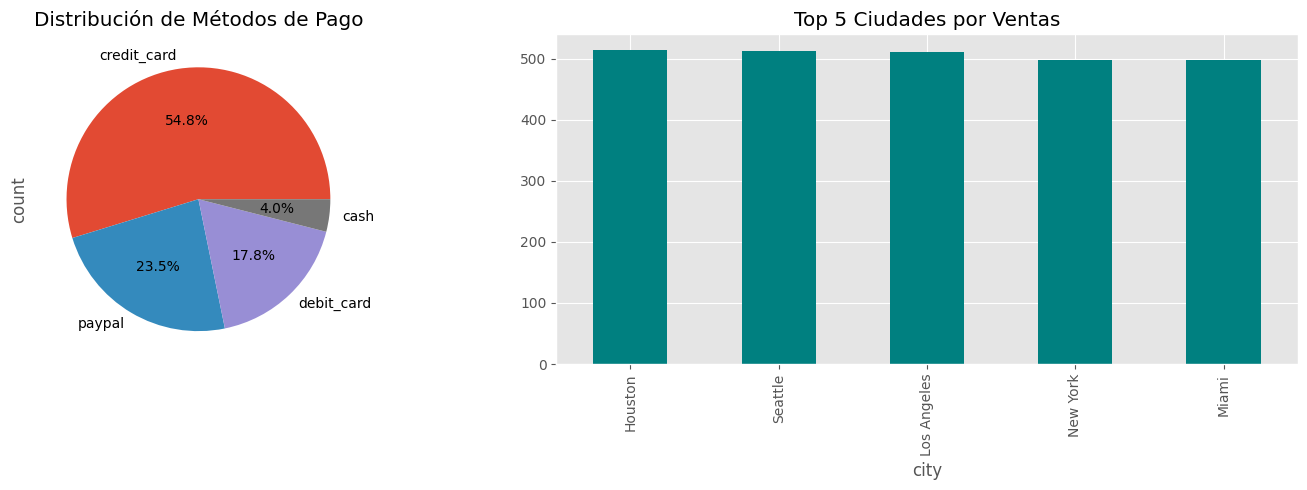

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Métodos de Pago
df['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Distribución de Métodos de Pago')

# Gráfico 2: Top 5 Ciudades
df['city'].value_counts().head(5).plot(kind='bar', ax=ax[1], color='teal')
ax[1].set_title('Top 5 Ciudades por Ventas')

plt.tight_layout()
plt.show()